In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df = df.drop(columns=["id"], errors="ignore")

In [13]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0]).astype(str)
    else:
        df[col] = df[col].fillna(df[col].median())

In [6]:
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [7]:
df.rename(columns={"num": "target"}, inplace=True)

In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
X = df.drop("target", axis=1)
y = df["target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.8315217391304348

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        75
           1       0.87      0.84      0.86       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



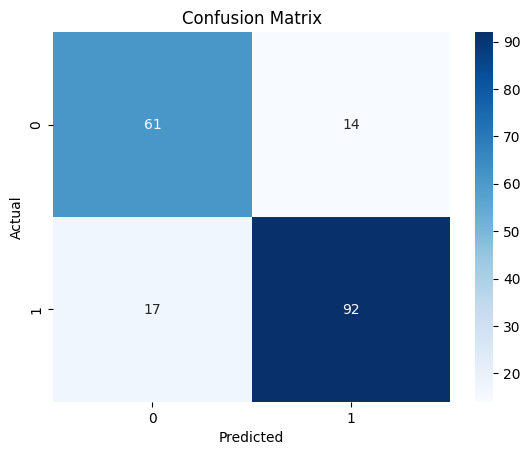

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

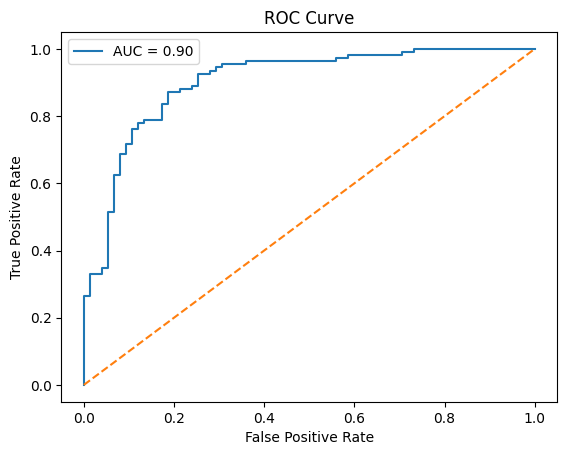

In [21]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [22]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
8,dataset_Switzerland,1.301665
4,oldpeak,0.754262
5,ca,0.675265
6,sex_Male,0.565255
9,dataset_VA Long Beach,0.491987
16,exang_True,0.461289
17,slope_flat,0.388797
7,dataset_Hungary,0.187120
2,chol,0.159558
15,restecg_st-t abnormality,0.090553
